# Name: N Abhishek

## Batch: July 2021
## Domain: Data Science & Business Analytics

# Task 1: Prediction using Supervised Machine Learning 

### Problem Statement

Predict the percentage of an student based on the no. of study hours

### Feature Description

1. **Hours:** Number of hours student has studied in a day.(Independent Variable)
2. **Scores:** Percentage of marks obtained by the student corresponding to the number of study hours.(Target Variable)

### Implementation

1. Understanding the data
2. Building a model
3. Evaluationg the model
4. Predicting the score if a student studies for 9.25 hrs/ day?

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Understanding the data

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

The dataset has records of 25 students and their scores correspondong to their study hours.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Hours is of type 'Float' and Scores of type 'Integer'. Hence the datatypes assigned are correct as per the Analysis.

#### Summary Statistics

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


The describe function gives information about the statistical measures such as mean, standard deviation, values for the different quartile ranges for both the features.

Max hours that a student has studied is **9.2 hrs**.<br>
Min hours that a student has studied is **1.1 hrs**.<br>
Max marks obtained by any student is **95**.<br>
Min marks obtained by any student is **17**.

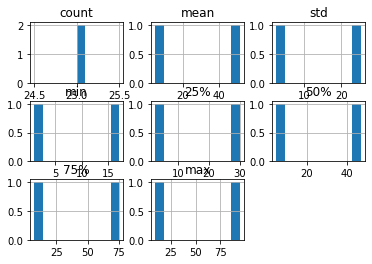

In [6]:
data.describe().T.hist()
plt.show()

 Let us see the marks obtained for the student with 9.2/1.1 hours of study

In [7]:
data[data.Hours==9.2]

,Hours,Scores
6,9.2,88


Since the maximum marks is 95, the student who has studied for the highest number of hours has not scored the Highest.

In [8]:
data[data.Hours==1.1]

,Hours,Scores
14,1.1,17


The student who has studied for the least number of hours is the one who scored the Least.

In [10]:
# Let us the number of hours that the topper invested.
data[data.Scores==data.Scores.max()]

,Hours,Scores
15,8.9,95


The student with the highest marks of 95 has put in 8.9 hours of study time which is 0.3 hours less than the student who has spent maximum of 9.2 hours.

### Missing value checker

In [11]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

#### Checking for non-standard missing values

In [12]:
for i in data.columns:
    print("Unique values for the column:",i)
    print(np.unique(data[i]))

Unique values for the column: Hours
[1.1 1.5 1.9 2.5 2.7 3.2 3.3 3.5 3.8 4.5 4.8 5.1 5.5 5.9 6.1 6.9 7.4 7.7
 7.8 8.3 8.5 8.9 9.2]
Unique values for the column: Scores
[17 20 21 24 25 27 30 35 41 42 47 54 60 62 67 69 75 76 81 85 86 88 95]


It is evident that there are no missing values present in the above columns.

#### duplicate entries

In [13]:
len(data[data.duplicated()])

0

There are no duplicate records in the dataset.

####  Distribution Check

Skew values of Variables:
Hours     0.190338
Scores    0.233965
dtype: float64


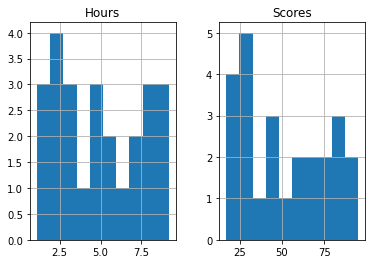

In [14]:
print("Skew values of Variables:")
print(data.skew())

data.hist()
plt.show()

From the above histogram plot, we see both the variables are normally distributed and their skew values are closer to 0.

#### Outlier Check

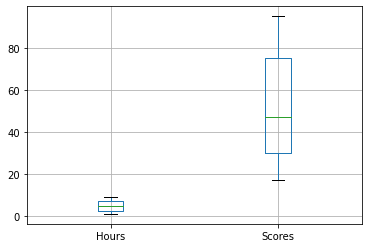

In [15]:
data.boxplot()
plt.show()

There are no outliers in any of the columns.

#### Checking for realationship between target and independent variable.

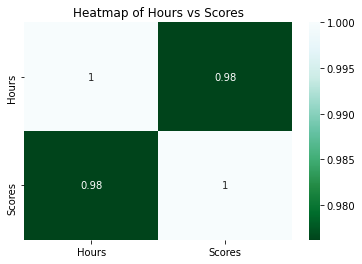

In [18]:
sns.heatmap(data.corr(),annot=True,cmap='BuGn_r')
plt.title("Heatmap of Hours vs Scores")
plt.show()

heatmap shows that Scores and Hours are strongly related with a correlation of 0.98 hence indicating linear relationship between Dependent and Independent.

## General Summary

1. The dataset has records of 25 students and their scores correspondong to their study hours.
2. Hours is of type 'Float' and Scores of type 'Integer'. Hence the datatypes assigned are correct as per the Analysis.
3. Since the maximum marks is 95, the student who has studied for the highest number of hours has not scored the Highest.
4. The student who has studied for the least number of hours is the one who scored the Least.
5. The student with the highest marks of 95 has put in 8.9 hours of study time which is 0.3 hours less than the student who has spent maximum of 9.2 hours.
6. Both the variables are normally distributed and their skew values are closer to 0.
7. heatmap shows that Scores and Hours are strongly related with a correlation of 0.98 hence indicating linear relationship between Dependent and Independent.

## 2. Building a Simple Linear Regression Model

In [19]:
# Defining the target as y and independent variable as X

X=data.drop("Scores",axis=1)
y=data["Scores"]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [20]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

### Linear Regression model from sci-kit learn


In [22]:
from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression object
lr=LinearRegression()

# Fit the model on the train data
lr_fit=lr.fit(X_train,y_train)

# Prediction for train and test
pred_train=lr_fit.predict(X_train)
pred_test=lr_fit.predict(X_test)

## 3. Model Performance Evaluation

In [23]:
# Checking r2_score

r2_score=lr_fit.score(X_train,y_train)
print("The R-Squared value: ",round(r2_score,3))

The R-Squared value:  0.958


The r-squared value is 0.95.

This means that the the target variable is able explain 95% of the variance due to the independent variable.

In [24]:
from sklearn.metrics import *

In [25]:
model_perfomance_score=pd.DataFrame(columns=["Train/Test","MAPE","RMSE","MAE"])
def model_perfomance_score_update(name,actual,predicted):
    global model_perfomance_score
    model_perfomance_score=model_perfomance_score.append({"Train/Test":name,
                                                          "MAPE":round(mean_absolute_percentage_error(actual,predicted),2),
                                                          "RMSE":round(np.sqrt(mean_squared_error(actual,predicted)),2),
                                                          "MAE":round(mean_absolute_error(actual,predicted),2)
                                                         },ignore_index=True)

In [26]:
model_perfomance_score_update("Train",y_train,pred_train)
model_perfomance_score_update("Test",y_test,pred_test)
model_perfomance_score=model_perfomance_score.set_index("Train/Test")
model_perfomance_score

,MAPE,RMSE,MAE
Train/Test,,,
Train,0.11,5.26,4.77
Test,0.16,5.86,5.63


Model is slightly overfitted on the Train data as the error on the train data is less than that of the test data.

But still the degree is overfitting is not  too high. It is acceptable.

### Residual distribution Check

In [27]:
residual= y_test-pred_test
residual

5     2.628577
1    -5.702923
13    6.962827
2    -7.055743
12   -5.814340
Name: Scores, dtype: float64

Residual Skewness: 0.8411274858317233


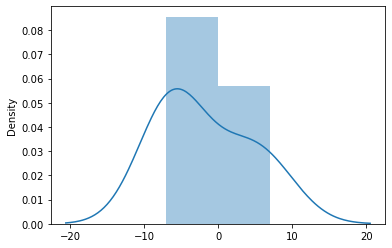

In [28]:
print("Residual Skewness:",residual.skew())
sns.distplot(x=residual)
plt.show()

From the distplot we can say the residuals are normally distributed. This is an indication that our model's performance is GOOD.

### 4. Predicting the score if a student studies for 9.25 hrs/ day?

In [29]:
hours_day=9.25
hours_day=np.array(hours_day).reshape(1, -1)
print("The predicted score if a student studies",hours_day[0][0],"hours in a day is:",round(lr_fit.predict(hours_day)[0],2))

The predicted score if a student studies 9.25 hours in a day is: 93.43
